In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
from scipy import stats

%matplotlib inline

sns.set()
sns.set(color_codes=True)
#sns.set_color_codes()

pd.options.display.max_rows = 15
pd.options.display.float_format = '{:,.4f}'.format

plt.style.use('seaborn-darkgrid')

# create a color palette
palette = plt.get_cmap('Set1')

SAVE=True


# Model results

In [2]:
models = ['MLP', 'RF', 'Bagging', 'Voting', 'kNN', 'DT', 'GBRT', 'LR', 'SVR']
results = [0.8216, 0.8190, 0.8185, 0.7716, 0.7647, 0.7609, 0.7007, 0.4575, 0.4509]

model_result_df = pd.DataFrame(list(zip(models, results)), 
               columns =['Model', 'R-Squred']) 
model_result_df 

,Model,R-Squred
0,MLP,0.8216
1,RF,0.8190
2,Bagging,0.8185
3,Voting,0.7716
4,kNN,0.7647
5,DT,0.7609
6,GBRT,0.7007
7,LR,0.4575
8,SVR,0.4509


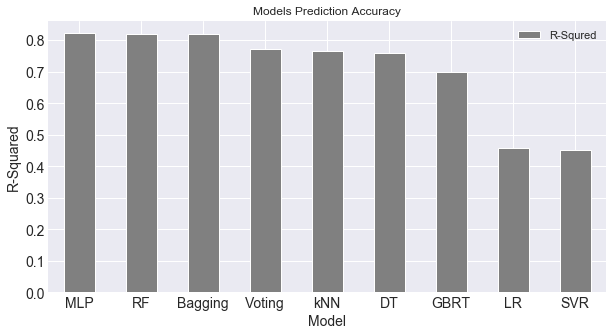

In [3]:
ax = model_result_df.plot.bar(x='Model', y='R-Squred', rot=0, figsize=(10, 5), fontsize=14
                              , title ="Models Prediction Accuracy", color='.5')
ax.set_xlabel("Model", fontsize=14)
ax.set_ylabel("R-Squared", fontsize=14)
plt.show()

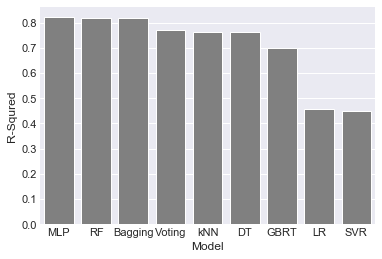

In [4]:
ax = sns.barplot(x="Model", y="R-Squred", data=model_result_df, color="grey", saturation=.5)

# Metrics

In [5]:
home_dir = '/Users/hmohamed/github/data-research-spring2020/sock-shop'

file_dir = home_dir + '/processed-data/'
input_file = 'orders_flow_data.csv'


In [6]:
def read_df(file_dir, data_file):
    df = pd.read_csv(file_dir + data_file)
    return to_time_series(df)

def to_time_series(df, index_col_name='date'):
    df[index_col_name] = pd.to_datetime(df[index_col_name])
    df.set_index(index_col_name, inplace=True)
    df.sort_index(inplace=True)
    return df

In [7]:
orders_flow_df = read_df(file_dir, input_file)
orders_flow_df.head(5) 

,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,...,user-db_net_use,shipping_net_use,payment_net_use,carts_net_use,carts-db_net_use,nodes_cpu_use,nodes_disk_io,nodes_net_use,orders_req,orders_ltcy
date,,,,,,,,,,,,,,,,,,,,,
2020-03-26 19:46:22,0.0300,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0300,0.0700,1.0000,...,2.2044,2.6585,8.9654,22.0117,4.7995,2.5000,1.6700,2.7617,0.1500,0.2400
2020-03-26 19:46:37,0.0600,0.0200,0.0200,0.0200,0.0200,0.0100,0.0100,0.1800,0.1800,1.0000,...,2.2044,2.6585,8.9654,22.0117,4.7995,1.8900,1.0100,2.7617,0.1500,0.2400
2020-03-26 19:46:52,0.0700,0.0300,0.0200,0.0300,0.0200,0.0100,0.0100,0.4400,0.2000,1.0000,...,16.0739,13.5708,16.9964,27.3438,16.6522,1.3500,0.0500,2.5880,0.1500,0.2400
2020-03-26 19:47:07,0.0700,0.0300,0.0200,0.0200,0.0200,0.0100,0.0100,0.2300,0.1700,1.0000,...,19.9869,14.4342,9.5804,9.4313,17.1768,1.2600,0.0400,2.1487,0.1300,0.2400
2020-03-26 19:47:22,0.0700,0.0200,0.0100,0.0200,0.0200,0.0100,0.0100,0.2400,0.1400,1.0000,...,10.4490,3.7392,2.7970,9.1791,6.2516,1.2800,0.2600,1.8080,0.3600,0.2400


In [8]:
# columns
for col in orders_flow_df.columns.values:
    print(col)

front-end_cpu_use
orders_cpu_use
orders-db_cpu_use
user_cpu_use
user-db_cpu_use
shipping_cpu_use
payment_cpu_use
carts_cpu_use
carts-db_cpu_use
front-end_pods
orders_pods
user_pods
shipping_pods
payment_pods
carts_pods
front-end_net_use
orders_net_use
orders-db_net_use
user_net_use
user-db_net_use
shipping_net_use
payment_net_use
carts_net_use
carts-db_net_use
nodes_cpu_use
nodes_disk_io
nodes_net_use
orders_req
orders_ltcy


# Request Rate vs. Latency

In [9]:
start = 2500
end = 2750
#series = [i for i in range(start, length) ]
df = orders_flow_df[start:end]

df.head(5)

,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,...,user-db_net_use,shipping_net_use,payment_net_use,carts_net_use,carts-db_net_use,nodes_cpu_use,nodes_disk_io,nodes_net_use,orders_req,orders_ltcy
date,,,,,,,,,,,,,,,,,,,,,
2020-03-27 06:11:22,1.4000,0.3300,0.0100,0.3900,0.2300,0.0200,0.0200,1.0800,0.0100,2.0000,...,199.6777,6.1599,8.5035,5.9550,2.0178,3.9000,0.0000,18.9522,7.2700,0.1000
2020-03-27 06:11:37,1.5500,0.3400,0.0100,0.4000,0.2400,0.0200,0.0200,1.0900,0.0100,2.0000,...,152.2660,6.3210,8.2517,4.0385,2.9937,3.9400,0.0000,19.2343,6.9600,0.1000
2020-03-27 06:11:52,1.5600,0.3200,0.0100,0.3900,0.2300,0.0200,0.0200,1.1600,0.0100,2.0000,...,159.9774,7.2810,8.3833,3.0758,2.9003,3.8700,0.0000,19.2413,6.5600,0.1000
2020-03-27 06:12:07,1.4600,0.3200,0.0100,0.3700,0.2300,0.0300,0.0200,1.0000,0.0100,2.0000,...,197.1287,8.1064,7.7743,5.2170,2.1192,3.8600,0.0200,18.9361,6.3600,0.0900
2020-03-27 06:12:22,1.4900,0.2800,0.0200,0.3600,0.2200,0.0300,0.0200,1.1100,0.1300,2.0000,...,160.1081,16.0484,6.6274,4.4558,2.6474,3.9300,0.0200,18.9853,7.0700,0.0900


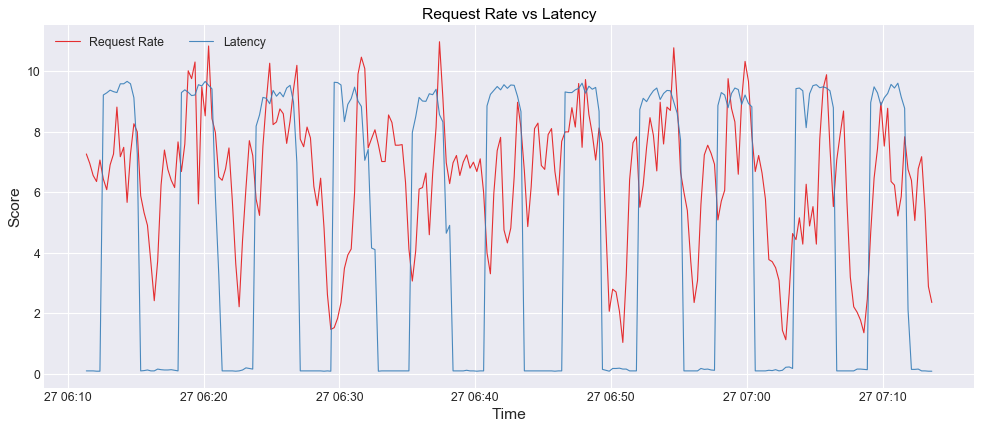

In [10]:

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
#fig= plt.figure(figsize=(10,3))


plt.plot(df.index.values, df['orders_req'], marker='', color=palette(0), linewidth=1
         , alpha=0.9, label='Request Rate')

plt.plot(df.index.values, df['orders_ltcy'], marker='', color=palette(1), linewidth=1
         , alpha=0.9, label='Latency')
    
plt.title("Request Rate vs Latency", loc='center', fontsize=14, fontweight=0, color='black')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Score", fontsize=14)

# Add legend
plt.legend(loc=2, ncol=2)

#if SAVE:
#    figure.savefig('/Users/hmohamed/github/infs890-ml-report/images/req_ltcy.png', dpi=100)

# Parallel coordinates plot

In [11]:
df_short = orders_flow_df 
df_short.orders_ltcy = df_short.orders_ltcy * 1000

if 1 == 1:
    minq = 100
    maxq = 400
    print('latency to choose min {} max {}'.format(minq, maxq))
    df_short = df_short[df_short['orders_ltcy'] >= minq]
    df_short = df_short[df_short['orders_ltcy'] <= maxq]
    print('size {}'.format(df_short.shape[0]))   
    

latency to choose min 100 max 400
size 2999


In [12]:
min_ltcy = df_short['orders_ltcy'].min()
max_ltcy = df_short['orders_ltcy'].max()
print('latcy min = {} and max = {}'.format(min_ltcy , max_ltcy))


latcy min = 100.0 and max = 400.0


## nodes cpu and disk I/O and net utilization

In [13]:

df_short['ltcy_cat'] = pd.cut(df_short.orders_ltcy,bins=[100,200,300,400])

df_short = df_short[df_short['ltcy_cat'].notna()]

df_short.shape


(2764, 30)

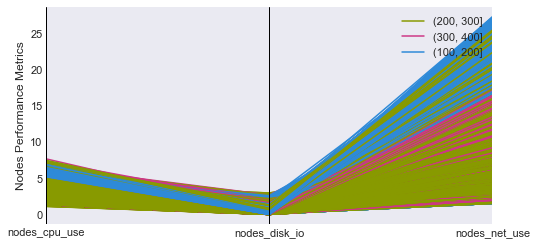

In [14]:
# 
df = df_short[['nodes_cpu_use', 'nodes_disk_io', 'nodes_net_use', 'ltcy_cat']]

plt.figure(figsize=(8,4))    # width * height

pd.plotting.parallel_coordinates(df, 'ltcy_cat', color=('#2e8ad8', '#cd3785', '#889a00') \
                                ,sort_labels=True)

plt.ylabel('Nodes Performance Metrics')
plt.show()


/opt/anaconda3/envs/infs890/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


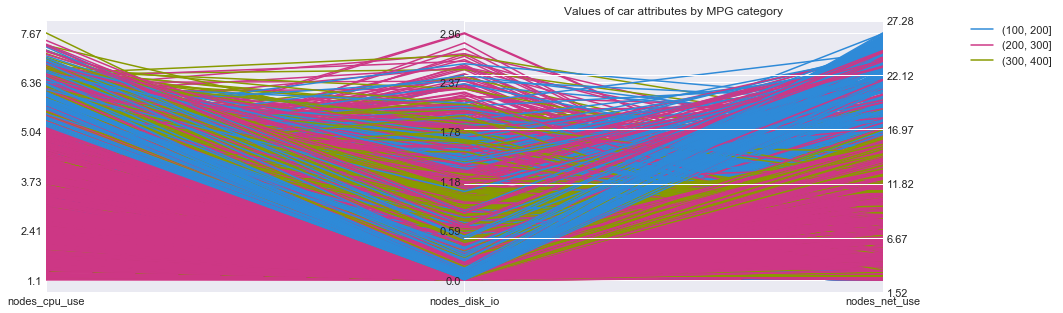

In [15]:
from matplotlib import ticker

cat_col = 'ltcy_cat'
cols = ['nodes_cpu_use', 'nodes_disk_io', 'nodes_net_use']
x = [i for i, _ in enumerate(cols)]
colours = ['#2e8ad8', '#cd3785', '#889a00'] #['#2e8ad8', '#cd3785', '#c64c00'] #, '#889a00']

# create dict of categories: colours
colours = {df[cat_col].cat.categories[i]: colours[i] for i, _ in enumerate(df[cat_col].cat.categories)}

# Create (X-1) sublots along x axis
fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))

# Get min, max and range for each column
# Normalize the data for each column
min_max_range = {}
for col in cols:
    min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
    df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))

# Plot each row
for i, ax in enumerate(axes):
    for idx in df.index:
        mpg_category = df.loc[idx, cat_col]
        ax.plot(x, df.loc[idx, cols], colours[mpg_category])
    ax.set_xlim([x[i], x[i+1]])
    
# Set the tick positions and labels on y axis for each plot
# Tick positions based on normalised data
# Tick labels are based on original data
def set_ticks_for_axis(dim, ax, ticks):
    min_val, max_val, val_range = min_max_range[cols[dim]]
    step = val_range / float(ticks-1)
    tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
    norm_min = df[cols[dim]].min()
    norm_range = np.ptp(df[cols[dim]])
    norm_step = norm_range / float(ticks-1)
    ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
    ax.yaxis.set_ticks(ticks)
    ax.set_yticklabels(tick_labels)

for dim, ax in enumerate(axes):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[dim]])
    

# Move the final axis' ticks to the right-hand side
ax = plt.twinx(axes[-1])
dim = len(axes)
ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
set_ticks_for_axis(dim, ax, ticks=6)
ax.set_xticklabels([cols[-2], cols[-1]])


# Remove space between subplots
plt.subplots_adjust(wspace=0)

# Add legend to plot
plt.legend(
    [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in df[cat_col].cat.categories],
    df[cat_col].cat.categories,
    bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

plt.title("Values of car attributes by MPG category")

plt.show()

## services cpu utilization

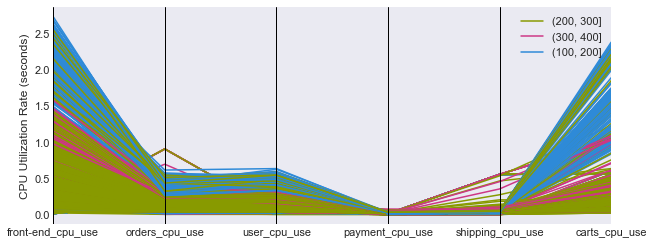

In [16]:
# 

df = df_short[['front-end_cpu_use','orders_cpu_use', 'user_cpu_use' \
                , 'payment_cpu_use','shipping_cpu_use', 'carts_cpu_use', 'ltcy_cat']]

plt.figure(figsize=(10,4)) 

pd.plotting.parallel_coordinates(df, 'ltcy_cat', color=('#2e8ad8', '#cd3785', '#889a00') \
                                ,sort_labels=True)

plt.ylabel('CPU Utilization Rate (seconds)')
plt.show()

In [ ]:
from matplotlib import ticker

cat_col = 'ltcy_cat'
cols = ['front-end_cpu_use','orders_cpu_use', 'user_cpu_use',  'carts_cpu_use']
x = [i for i, _ in enumerate(cols)]
colours = ['#2e8ad8', '#cd3785', '#889a00'] #['#2e8ad8', '#cd3785', '#c64c00'] #, '#889a00']

# create dict of categories: colours
colours = {df[cat_col].cat.categories[i]: colours[i] for i, _ in enumerate(df[cat_col].cat.categories)}

# Create (X-1) sublots along x axis
fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))

# Get min, max and range for each column
# Normalize the data for each column
min_max_range = {}
for col in cols:
    min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
    df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))

# Plot each row
for i, ax in enumerate(axes):
    for idx in df.index:
        mpg_category = df.loc[idx, cat_col]
        ax.plot(x, df.loc[idx, cols], colours[mpg_category])
    ax.set_xlim([x[i], x[i+1]])
    
# Set the tick positions and labels on y axis for each plot
# Tick positions based on normalised data
# Tick labels are based on original data
def set_ticks_for_axis(dim, ax, ticks):
    min_val, max_val, val_range = min_max_range[cols[dim]]
    step = val_range / float(ticks-1)
    tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
    norm_min = df[cols[dim]].min()
    norm_range = np.ptp(df[cols[dim]])
    norm_step = norm_range / float(ticks-1)
    ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
    ax.yaxis.set_ticks(ticks)
    ax.set_yticklabels(tick_labels)

for dim, ax in enumerate(axes):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[dim]])
    

# Move the final axis' ticks to the right-hand side
ax = plt.twinx(axes[-1])
dim = len(axes)
ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
set_ticks_for_axis(dim, ax, ticks=6)
ax.set_xticklabels([cols[-2], cols[-1]])


# Remove space between subplots
plt.subplots_adjust(wspace=0)

# Add legend to plot
plt.legend(
    [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in df[cat_col].cat.categories],
    df[cat_col].cat.categories,
    bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

plt.title("Values of car attributes by MPG category")

plt.show()

## services pods

/opt/anaconda3/envs/infs890/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


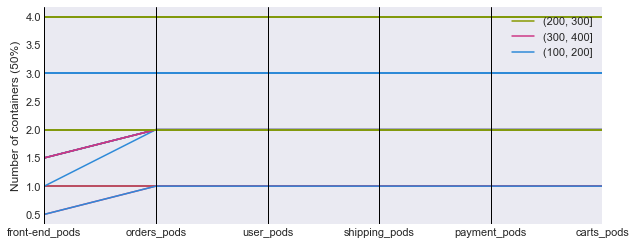

In [18]:
# 

df = df_short[['front-end_pods','orders_pods','user_pods','shipping_pods', \
               'payment_pods','carts_pods']]

#df = df.multiply(2)

df['ltcy_cat'] = df_short['ltcy_cat']

#xcols = ['frontend_cntr', 'orders_cntr', 'users_cntr', 'shipping_cntr', 'payment_cntr', 'carts_cntr']

plt.figure(figsize=(10,4)) 

pd.plotting.parallel_coordinates(df, 'ltcy_cat', color=('#2e8ad8', '#cd3785', '#889a00') \
                               ,sort_labels=True )

plt.ylabel('Number of containers (50%)')
plt.show()

## Services net utilization

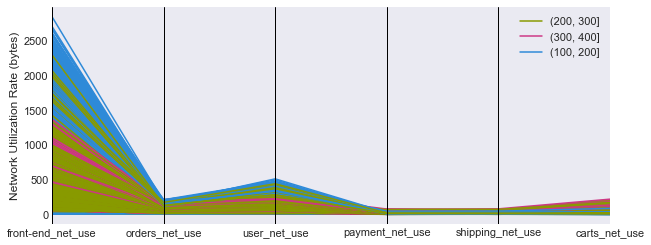

In [19]:


# 

df = df_short[['front-end_net_use','orders_net_use','user_net_use' \
               ,'payment_net_use','shipping_net_use','carts_net_use', 'ltcy_cat']]

plt.figure(figsize=(10,4)) 

pd.plotting.parallel_coordinates(df, 'ltcy_cat', color=('#2e8ad8', '#cd3785', '#889a00') \
                                ,sort_labels=True)

plt.ylabel('Network Utilization Rate (bytes)')
plt.show()

In [ ]:
from matplotlib import ticker

cat_col = 'ltcy_cat'
cols = ['front-end_net_use','orders_net_use','user_net_use','carts_net_use']
x = [i for i, _ in enumerate(cols)]
colours = ['#2e8ad8', '#cd3785', '#889a00'] #['#2e8ad8', '#cd3785', '#c64c00'] #, '#889a00']

# create dict of categories: colours
colours = {df[cat_col].cat.categories[i]: colours[i] for i, _ in enumerate(df[cat_col].cat.categories)}

# Create (X-1) sublots along x axis
fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))

# Get min, max and range for each column
# Normalize the data for each column
min_max_range = {}
for col in cols:
    min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
    df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))

# Plot each row
for i, ax in enumerate(axes):
    for idx in df.index:
        mpg_category = df.loc[idx, cat_col]
        ax.plot(x, df.loc[idx, cols], colours[mpg_category])
    ax.set_xlim([x[i], x[i+1]])
    
# Set the tick positions and labels on y axis for each plot
# Tick positions based on normalised data
# Tick labels are based on original data
def set_ticks_for_axis(dim, ax, ticks):
    min_val, max_val, val_range = min_max_range[cols[dim]]
    step = val_range / float(ticks-1)
    tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
    norm_min = df[cols[dim]].min()
    norm_range = np.ptp(df[cols[dim]])
    norm_step = norm_range / float(ticks-1)
    ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
    ax.yaxis.set_ticks(ticks)
    ax.set_yticklabels(tick_labels)

for dim, ax in enumerate(axes):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[dim]])
    

# Move the final axis' ticks to the right-hand side
ax = plt.twinx(axes[-1])
dim = len(axes)
ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
set_ticks_for_axis(dim, ax, ticks=6)
ax.set_xticklabels([cols[-2], cols[-1]])


# Remove space between subplots
plt.subplots_adjust(wspace=0)

# Add legend to plot
plt.legend(
    [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in df[cat_col].cat.categories],
    df[cat_col].cat.categories,
    bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

plt.title("Values of car attributes by MPG category")

plt.show()

# Orders CPU Utilization vs. Latency

In [ ]:
#
orders_cpu_df = df_short[['orders_cpu_use', 'orders_ltcy']]
orders_cpu_df = orders_cpu_df.groupby(['orders_cpu_use'], sort=True)['orders_ltcy'].max()
orders_cpu_df = pd.DataFrame(orders_cpu_df)
#df.sort_values(by=['orders_cpu_use'])
orders_cpu_df = orders_cpu_df.reset_index()
print('orders_cpu_df has {} records'.format(orders_cpu_df.shape[0]))

plt.figure(figsize=(10,4)) 
plt.plot(orders_cpu_df['orders_cpu_use'][40:60], orders_cpu_df['orders_ltcy'][40:60], 'b-', label="cpu_use")

plt.legend(loc='best')
plt.xlabel('Orders Service CPU Utilization Rate', fontsize=14)
plt.ylabel('95th Percentile Latency', fontsize=14)
plt.title('Orders CPU Utilization Rate vs 95th Latency', fontsize=14)

In [ ]:
#
orders_net_df = df_short[['orders_net_use', 'orders_ltcy']]
orders_net_df = orders_net_df.groupby(['orders_net_use'], sort=True)['orders_ltcy'].max()
orders_net_df = pd.DataFrame(orders_net_df)

orders_net_df = orders_net_df.reset_index()
print('orders_net_df has {} records'.format(orders_net_df.shape[0]))

plt.figure(figsize=(10,4)) 
plt.plot(orders_net_df['orders_net_use'][40:60], orders_net_df['orders_ltcy'][40:60], 'b-', label="net_use")
plt.xlabel('Orders Service Network Utilization Rate', fontsize=14)
plt.ylabel('95th Percentile Latency', fontsize=14)
plt.title('Orders Network Utilization Rate vs 95th Latency', fontsize=14)

# metrics vs time